# **US Health Outcomes (Progress Report)**

**Group Leader:**\
*Ryyan Hussain* (rhuss4@uic.edu, [rhuss04](https://github.com/rhuss04))

**Group Members:**\
*Arjun Ancha* (aanch@uic.edu, [ArjunAncha](https://github.com/ArjunAncha))\
*Amit Bhatt*  (abhat32@uic.edu, [amitbhatt-star](https://github.com/amitbhatt-star))\
*Mateo Castillo* (mcast29@uic.edu, [CatMats](https://github.com/CatMats))\
*Joshua John* (jjohn314@uic.edu, [jjohn314](https://github.com/jjohn314))

## Introduction
This project investigates county-level health outcomes in the United States using the CDC’s PLACES dataset, which provides small and detailed estimates for public health indicators. 

The dataset contains over 2 million records, each representing a county, a specific health condition, and its associated prevalence rate, both crude and age-adjusted. This  project will focus on analyzing 4 major health outcomes: obesity, depression, binge drinking, and overall disability.

The central goal is to identify geographic patterns, correlations, and potential socioeconomic factors that influence the previously mentioned patterns. Understanding these complex relationships will expose regional inequalities and can inform future public policy decisions. 

## Changes

After conducting our initial data preparation and exploratory data analysis (EDA), we have reviewed our original project scope and found that no changes are necessary at this time.

## Data

The dataset used in the project is the 2023 CDC PLACES release in CSV format. Data preparation, coded in Python, includes the following steps:

1. Loading the CSV file into Python using pandas.
2. Cleaning column names by stripping leading and trailing spaces.
3. Cleaning the Measure column by stripping spaces and converting text to lowercase for consistent filtering.
4. Filtering for targeted health measures: Obesity, Binge Drinking, Disability, and Depression.
5. Filtering by prevalence type, keeping only age-adjusted values and discarding crude values to ensure comparability across counties.
6. Pivoting the DataFrame so that each row represents a county and each column represents a measure’s prevalence value, resulting in a clean format ready for exploratory data analysis and visualization.


The filtered data contains 27430 rows, with each row representing a U.S location.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#The initial dataframe itself, unfiltered.
filePath = "PLACES__Local_Data_for_Better_Health__Place_Data_2023_release.csv"
df = pd.read_csv(filePath)

print("Dataset shape:", df.shape)
print(df.head())

# Clean Measure column (strip + lowercase)
df["Measure"] = df["Measure"].str.strip().str.lower()

# All distinct measures
all_measures = sorted(df["Measure"].unique())

# Pretty print
for i, m in enumerate(all_measures, 1):
    print(f"{i:02d}. {m}")

Dataset shape: (2054768, 21)
   Year StateAbbr  StateDesc LocationName DataSource         Category  \
0  2021        MO   Missouri    West Line      BRFSS  Health Outcomes   
1  2021        MO   Missouri  West Plains      BRFSS  Health Outcomes   
2  2021        MO   Missouri     Westwood      BRFSS  Health Outcomes   
3  2021        WI  Wisconsin     Florence      BRFSS       Prevention   
4  2021        MO   Missouri    Whiteside      BRFSS       Disability   

                                             Measure Data_Value_Unit  \
0  Chronic obstructive pulmonary disease among ad...               %   
1             Arthritis among adults aged >=18 years               %   
2             Arthritis among adults aged >=18 years               %   
3  Taking medicine for high blood pressure contro...               %   
4  Cognitive disability among adults ages >=18 years               %   

           Data_Value_Type  Data_Value  ... Data_Value_Footnote  \
0         Crude prevalence      

In [3]:
df.columns = df.columns.str.strip()

df["Measure"] = df["Measure"].str.strip().str.lower()

#assign targetMeasures to help with getting specific health outcomes
targetMeasures = [
    "obesity among adults aged >=18 years",
    "depression among adults aged >=18 years",
    "binge drinking among adults aged >=18 years",
    "any disability among adults aged >=18 years",
    "no leisure-time physical activity among adults aged >=18 years",
    "current smoking among adults aged >=18 years",
    "sleeping less than 7 hours among adults aged >=18 years",
    "high blood pressure among adults aged >=18 years",
    "high cholesterol among adults aged >=18 years who have been screened in the past 5 years",
    "coronary heart disease among adults aged >=18 years",
    "stroke among adults aged >=18 years",
    "fair or poor self-rated health status among adults aged >=18 years",
    "mental health not good for >=14 days among adults aged >=18 years",
    "current lack of health insurance among adults aged 18-64 years",
    "visits to doctor for routine checkup within the past year among adults aged >=18 years",
    "visits to dentist or dental clinic among adults aged >=18 years",
    "independent living disability among adults aged >=18 years",
    "mobility disability among adults aged >=18 years",
    "diagnosed diabetes among adults aged >=18 years",
]

#the new dataframe, filtering only to have target measures to prevent fluff data.
dfFiltered = df[df["Measure"].isin(targetMeasures)]
dfFiltered = dfFiltered[dfFiltered["Data_Value_Type"] == "Age-adjusted prevalence"]

#new dataframe is pivoted into a wide format
dfWide = dfFiltered.pivot_table(
    index=["StateAbbr", "StateDesc", "LocationName", "TotalPopulation"],
    columns="Measure",
    values="Data_Value"
).reset_index()

dfWide.columns.name = None

#filtered data is saved into a csv file
dfWide.to_csv('filtered_PLACESData_2023.csv', index=False)

#previewing the new data by it's head (first 5 rows)
print(dfWide.shape)
print(dfWide.head())
print(dfWide["StateAbbr"].unique())


(27430, 23)
  StateAbbr StateDesc LocationName  TotalPopulation  \
0        AK    Alaska     Akiachak              627   
1        AK    Alaska        Akiak              346   
2        AK    Alaska       Akutan             1027   
3        AK    Alaska     Alakanuk              677   
4        AK    Alaska    Aleknagik              219   

   any disability among adults aged >=18 years  \
0                                         50.5   
1                                         50.4   
2                                         28.5   
3                                         54.0   
4                                         41.4   

   binge drinking among adults aged >=18 years  \
0                                         15.8   
1                                         15.6   
2                                         15.1   
3                                         15.3   
4                                         18.6   

   coronary heart disease among adults aged >=18 years 

## EDA 


Descriptive statistics show that obesity and any form of disability are more prevalent than binge drinking and depression, with average prevalence values of 36.1% and 29.8% compared to 17.9% and 23.5%, respectively. 
The standard deviations for obesity (5.6) and disability (6.8) are higher than those for depression (3.5) and binge drinking (2.8), indicating a wider spread of values. 

State-level bar charts reveal clear regional patterns. 
Southern states generally exhibit higher prevalence of obesity, depression, and disability, while binge drinking deviates from this pattern, being concentrated in the Midwest, with Wisconsin showing the highest rates. These patterns suggest geographic clustering of negative health outcomes.

Correlation analysis supports these observations. Obesity and disability are strongly positively correlated, indicating that these conditions often co-occur. 
Depression shows moderate positive correlation with obesity and disability, while binge drinking is negatively correlated with the other three measures, with the strongest negative correlation observed with disability. These findings highlight interesting relationships in the data and provide a foundation for further analysis.

Hypothesis 1: Binge drinking is negatively correlated with disability, obesity, and depression implying that causes of said medical condition may be influenced by different socioeconomic and health patterns that the other measures. 

Hypothesis 2: There is a significant inverse relationship between the prevalence of binge drinking and the prevalence of chronic negative health outcomes, specifically disability and obesity.

In [4]:
#Reading processed filtered data
filePath = "filtered_PLACESData_2023.csv"
dfWide = pd.read_csv(filePath)

targetMeasures = [
    "obesity among adults aged >=18 years",
    "depression among adults aged >=18 years",
    "binge drinking among adults aged >=18 years",
    "any disability among adults aged >=18 years"
]
summary_stats = dfWide[targetMeasures].describe()
print(summary_stats)

       obesity among adults aged >=18 years  \
count                          26530.000000   
mean                              36.089284   
std                                5.596153   
min                               13.900000   
25%                               32.800000   
50%                               36.500000   
75%                               39.600000   
max                               60.400000   

       depression among adults aged >=18 years  \
count                             26530.000000   
mean                                 23.150903   
std                                   3.484732   
min                                  10.200000   
25%                                  20.900000   
50%                                  23.300000   
75%                                  25.400000   
max                                  35.400000   

       binge drinking among adults aged >=18 years  \
count                                 26530.000000   
mean             

### State Prevalences (Joshua John)

This component of the project focuses on understanding health outcomes at the state level by averaging county-level prevalence data across each state. For each of the four selected health measures—obesity, depression, binge drinking, and disability—we compute statewide averages and rank all states from highest to lowest. An interactive tool allows the user to choose a measure and instantly view both the Top 10 and Bottom 10 states through bar charts and a full sorted table.
This provides a clear geographic overview of U.S. health trends, highlighting regional clusters such as the South having consistently higher obesity and disability rates, while binge drinking is concentrated in Midwestern states. These patterns help contextualize broader public health inequalities across the country.

Select a health measure to sort states by (ascending):
1: Obesity Among Adults Aged >=18 Years
2: Depression Among Adults Aged >=18 Years
3: Binge Drinking Among Adults Aged >=18 Years
4: Any Disability Among Adults Aged >=18 Years


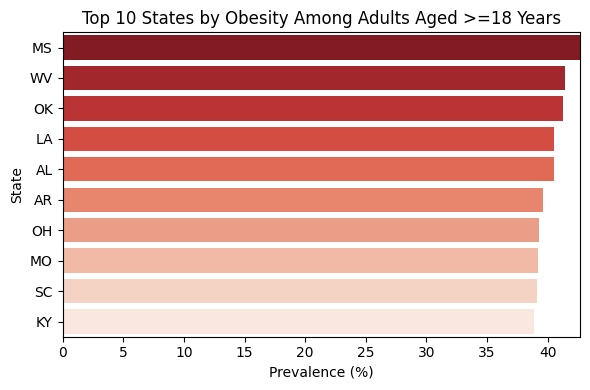

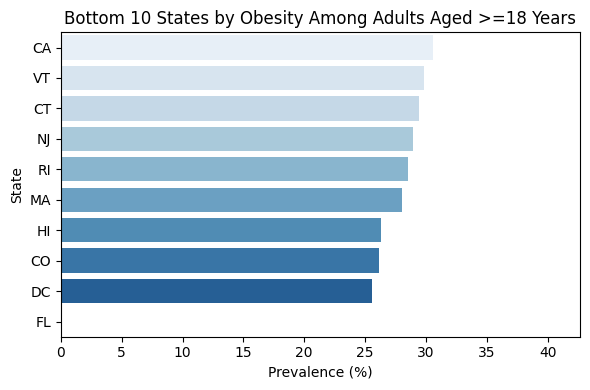

States sorted by ascending Obesity Among Adults Aged >=18 Years:
   StateAbbr  obesity among adults aged >=18 years
0         MS                             42.653911
1         WV                             41.431043
2         OK                             41.251897
3         LA                             40.519486
4         AL                             40.514462
5         AR                             39.586847
6         OH                             39.307615
7         MO                             39.223593
8         SC                             39.102828
9         KY                             38.850760
10        ND                             38.765909
11        NE                             38.700825
12        KS                             38.631973
13        TX                             38.106106
14        GA                             37.804715
15        AK                             37.769869
16        IN                             37.553414
17        NC     

In [5]:
# printing options of availible health measures
print("Select a health measure to sort states by (ascending):")
measureColumnsDictionary = {
    1: "obesity among adults aged >=18 years",
    2: "depression among adults aged >=18 years",
    3: "binge drinking among adults aged >=18 years",
    4: "any disability among adults aged >=18 years"
}
for key, val in measureColumnsDictionary.items():
    print(f"{key}: {val.title()}")

#ask for user's health outcome to analyze (number inputs 1-4)
while True:
    choice = int(input("\nEnter 1, 2, 3, or 4: ").strip())
    if 1 <= choice <= 4:
        break
    else:
        print("**Invalid choice.. try again.")

#health measure selected and states are ordered before visual
selectedMeasure = measureColumnsDictionary[choice]
dfStateAverage = dfWide.groupby("StateAbbr")[selectedMeasure].mean().reset_index()
dfStateAverage = dfStateAverage.sort_values(selectedMeasure, ascending=False).reset_index(drop=True)

#showing figure for top 10 states
topStates = dfStateAverage.head(10)
plt.figure(figsize=(6,4))
ax = sns.barplot(data=topStates, x=selectedMeasure, y="StateAbbr", hue="StateAbbr", palette="Reds_r", legend=False)
ax.set(title=f'Top 10 States by {selectedMeasure.title()}', xlabel='Prevalence (%)', ylabel='State')
plt.xlim(0, dfStateAverage[selectedMeasure].max())
plt.tight_layout()
plt.show()

#showing figure for bottom 10 states
bottomStates = dfStateAverage.tail(10)
plt.figure(figsize=(6,4))
ax = sns.barplot(data=bottomStates, x=selectedMeasure, y="StateAbbr", hue="StateAbbr", palette="Blues", legend=False)
ax.set(title=f'Bottom 10 States by {selectedMeasure.title()}', xlabel='Prevalence (%)', ylabel='State')
plt.xlim(0, dfStateAverage[selectedMeasure].max())
plt.tight_layout()
plt.show()

#raw text for all states
print(f"States sorted by ascending {selectedMeasure.title()}:")
print(dfStateAverage)

### Location Prevalence by State (Arjun Ancha)
#### Description (Joshua John)

This tool provides a more granular, “zoomed-in” analysis of health outcomes within individual states. After selecting a health measure and entering a state abbreviation, the program filters the dataset to show only the locations within that state. It then ranks these locations from highest to lowest prevalence and visualizes both the Top 50 and Bottom 50 locations using bar charts.
This deeper breakdown highlights county-level variation that may be hidden when looking only at statewide averages. Even states with moderate overall prevalence often contain local hotspots with significantly higher rates, as well as counties with notably lower prevalence. This tool allows for detailed regional comparison and helps identify specific areas that contribute most to a state’s overall health trends.

Select a health measure:
1: Obesity Among Adults Aged >=18 Years
2: Depression Among Adults Aged >=18 Years
3: Binge Drinking Among Adults Aged >=18 Years
4: Any Disability Among Adults Aged >=18 Years


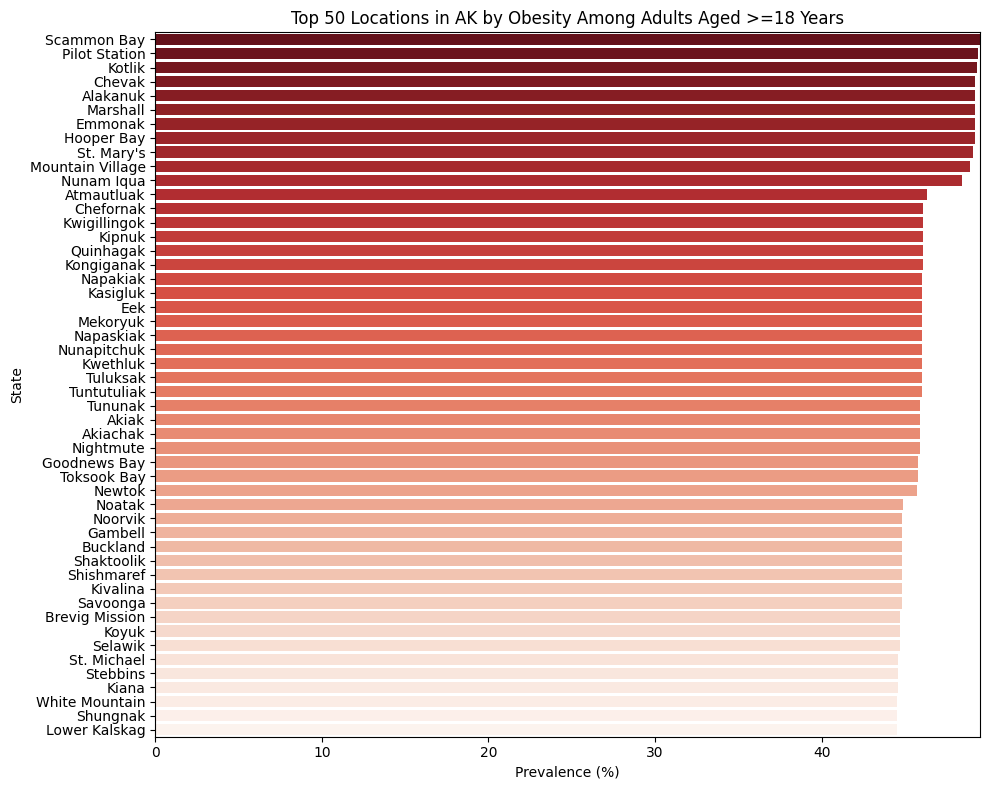

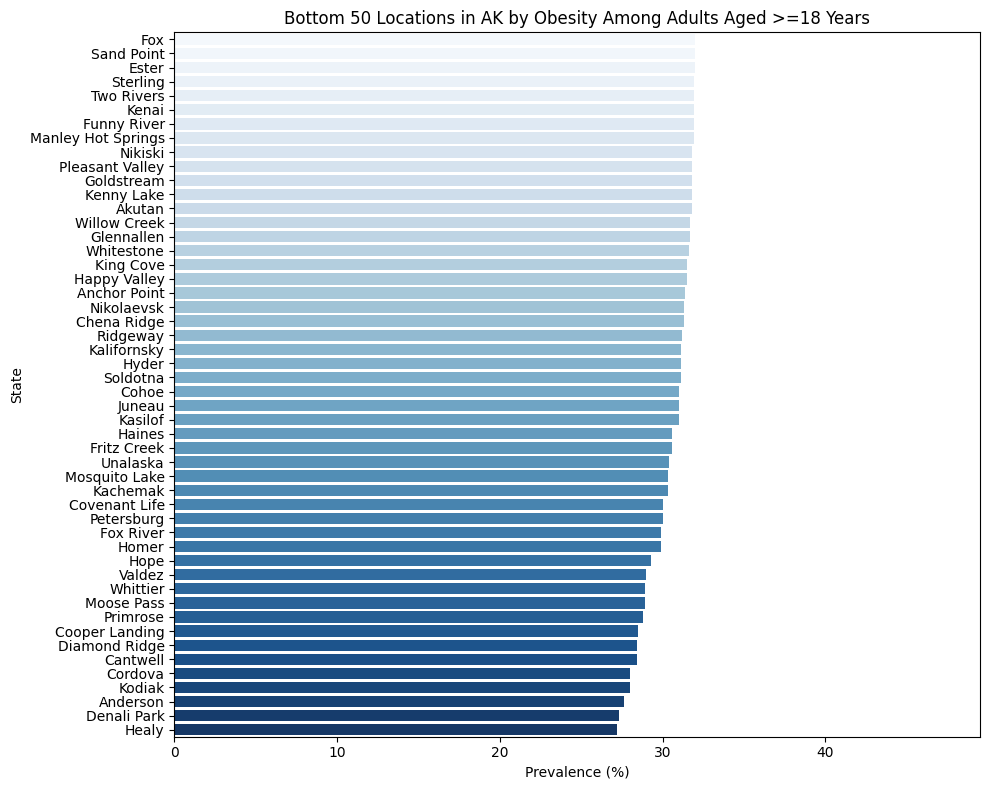

In [6]:
#printing options of availible health measures
print("Select a health measure:")
for key, val in measureColumnsDictionary.items():
    print(f"{key}: {val.title()}")

#ask for user's health outcome to analyze (number inputs 1-4)
while True:
    choice2 = int(input("\nEnter 1, 2, 3, or 4: ").strip())
    if 1 <= choice2 <= 4:
        break
    else:
        print("**Invalid choice.. try again.")

#health measure selected
selectedMeasure2 = measureColumnsDictionary[choice2]

#ask for user's state to query (i.e. AK, AL)
validStates = dfWide["StateAbbr"].unique()
while True:
    state = input("Enter the 2-letter state abbreviation").strip().upper()
    if state in validStates:
        break
    else:
        print("**Invalid choice.. try again.")

#state is selected and locations are ordered before visual.
dfStateLocations = dfWide[dfWide["StateAbbr"] == state]
dfStateLocations = dfStateLocations.sort_values(selectedMeasure2, ascending=False)

#showing figure for top 50 locations
topLocations = dfStateLocations.head(50)
plt.figure(figsize=(10,8))
ax = sns.barplot(data=topLocations, x=selectedMeasure2, y="LocationName", hue="LocationName", palette="Reds_r", legend=False)
ax.set(title=f'Top 50 Locations in {state} by {selectedMeasure2.title()}', xlabel='Prevalence (%)', ylabel='State')
plt.xlim(0, dfStateLocations[selectedMeasure2].max())
plt.tight_layout()
plt.show()

#showing figure for bottom 50 locations
bottomLocations = dfStateLocations.tail(50)
plt.figure(figsize=(10,8))
ax = sns.barplot(data=bottomLocations, x=selectedMeasure2, y="LocationName", hue="LocationName", palette="Blues", legend=False)
ax.set(title=f'Bottom 50 Locations in {state} by {selectedMeasure2.title()}', xlabel='Prevalence (%)', ylabel='State')
plt.xlim(0, dfStateLocations[selectedMeasure2].max())
plt.tight_layout()
plt.show()

### Correlation Matrix (Arjun Ancha)

This heatmap is used to quickly measure the strength and direction of the relationship between pairs of each health measure.

In the Disability column, we see that there is a positive correlation with both obesity and depression.

We also see that the Binge Drinking column has a negative correlation with every other measure. Its relationship with Disability is strongly negative, showing an inverse relationship.

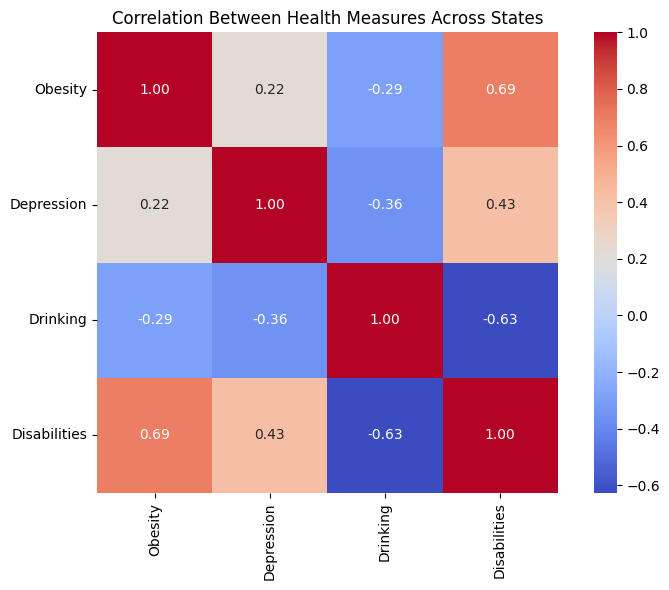

In [7]:
measureColumns = [
    "obesity among adults aged >=18 years",
    "depression among adults aged >=18 years",
    "binge drinking among adults aged >=18 years",
    "any disability among adults aged >=18 years"
]


dfState = dfWide.groupby("StateAbbr")[measureColumns].mean()


stateCorrelation = dfState.corr()


plt.figure(figsize=(8, 6))
ax = sns.heatmap(stateCorrelation, annot=True, cmap="coolwarm", fmt=".2f", square=True)
ax.set(title="Correlation Between Health Measures Across States")

#Renaming existing ticks
newLabels = ["Obesity", "Depression", "Drinking", "Disabilities"]
ax.set_xticks(np.arange(len(newLabels)) + 0.5)
ax.set_xticklabels(newLabels)
ax.set_yticks(np.arange(len(newLabels)) + 0.5)
ax.set_yticklabels(newLabels)

#tightening and showing the figure
plt.tight_layout()
plt.show()


### Violin Plot (Mateo Castillo)

This Violin plot is used to make a side-by-side comparison of the full shape and spread for the 4 health measures at a glance.

What it is showing is how widely distributed these health measures are accounted for across all the US's counties.

We can see that 'Disability' and 'Obesity' by itself are taller, meaning there is a more broad range of outcomes across the country(i.e. the counties with the highest and lowest rates are very far apart).

Meanwhile, 'Depression' and 'Binge Drinking' are shorter, which means that the prevalence rates are more consistent and fall within a more specific range across the nation (i.e. most counties are very similar to each other on these measures).

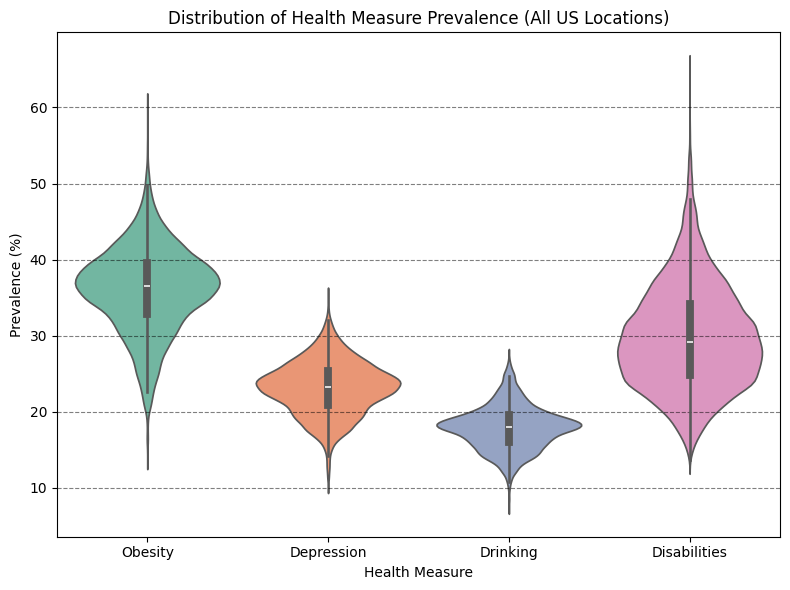

In [8]:
dfLong = dfWide.melt(id_vars=["StateAbbr", "LocationName"],
                     value_vars=measureColumns,
                     var_name="Measure",
                     value_name="Prevalence")

#creating the plot
plt.figure(figsize=(8, 6))
ax = sns.violinplot(data=dfLong, x="Measure", y="Prevalence", hue="Measure", palette="Set2", legend=False)
ax.set(title='Distribution of Health Measure Prevalence (All US Locations)', xlabel='Health Measure', ylabel='Prevalence (%)')

#renaming existing ticks
newLabels = ["Obesity", "Depression", "Drinking", "Disabilities"]
ax.set_xticks(range(len(newLabels)))
ax.set_xticklabels(newLabels)

#adding horizontal lines for easier visual comparison
ax.grid(True, axis='y', linestyle='--', color='black', alpha=0.5)

#tightening and showing the figure
plt.tight_layout()
plt.show()

### Pairplot (Joshua John)

A multi-variable visual overview of health measure relationships.

This pairplot visualizes all pairwise relationships among the four health measures: obesity, depression, binge drinking, and disability. It displays scatterplots for each measure pair and kernel density estimates on the diagonals. This provides a deeper view of distribution shapes, clustering patterns, and non-linear relationships across U.S. counties. It also visually confirms trends seen in the correlation matrix, especially the negative association between binge drinking and other outcomes.

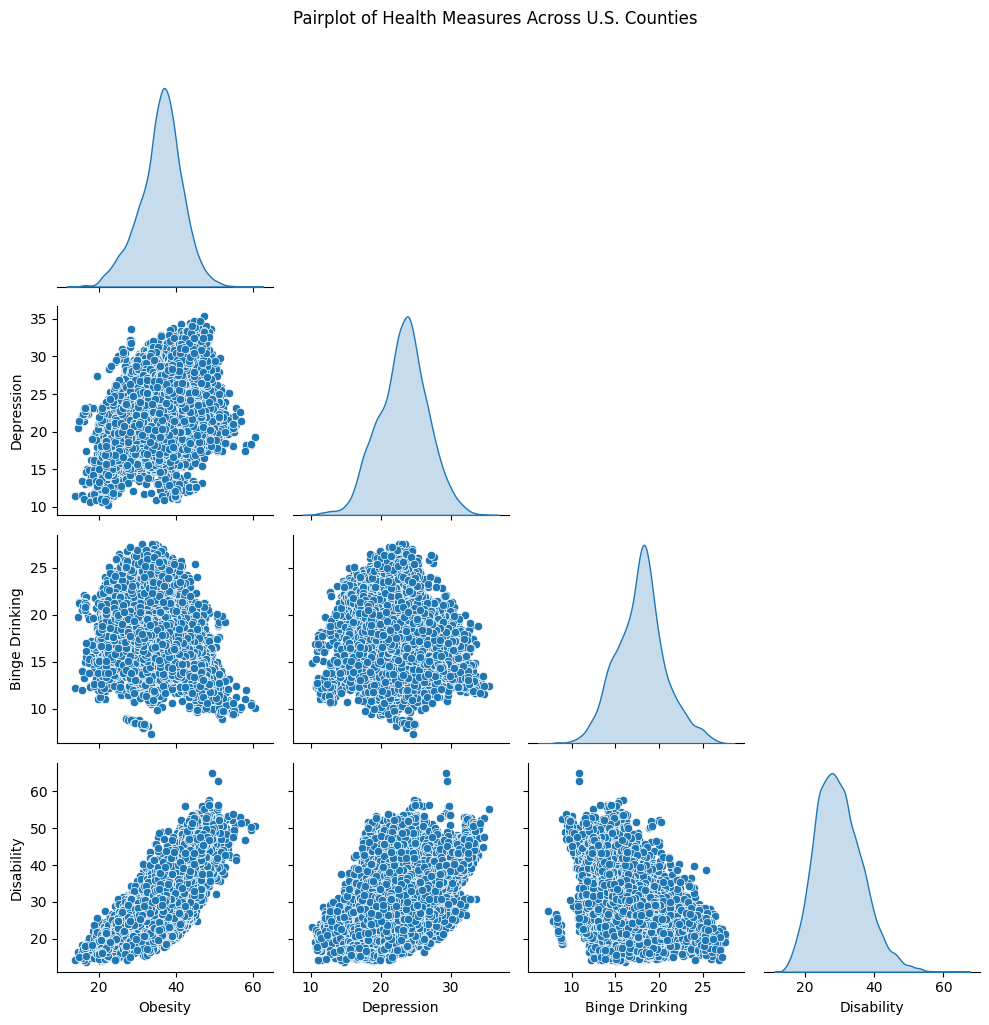

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Original long column names
measures = [
    "obesity among adults aged >=18 years",
    "depression among adults aged >=18 years",
    "binge drinking among adults aged >=18 years",
    "any disability among adults aged >=18 years"
]

# Create a cleaner version of the dataframe with short labels
dfPair = dfWide[measures].rename(columns={
    "obesity among adults aged >=18 years": "Obesity",
    "depression among adults aged >=18 years": "Depression",
    "binge drinking among adults aged >=18 years": "Binge Drinking",
    "any disability among adults aged >=18 years": "Disability"
})

# Generate the pairplot
sns.pairplot(dfPair, corner=True, diag_kind="kde")

# Add a title and fix layout issues
plt.suptitle("Pairplot of Health Measures Across U.S. Counties", y=1.02)
plt.tight_layout()
plt.show()


### Hexbin Plot (Amit Bhatt)

A normal scatter plot with 2 million rows will just look like a big blob.
A hexbin plot shows where the points are dense using color.
What it shows:

- How disability changes as obesity increases.


- Where most counties are (high density areas).


- You can see if higher obesity is linked with higher disability.

This is a hexbin plot of obesity vs. disability.
Each hexagon shows how many counties fall in that range. We observe that counties with higher obesity tend to have higher disability, and most counties are grouped in the mid-range of both measures. This gives a clearer picture than a simple scatter plot, especially with a large dataset.

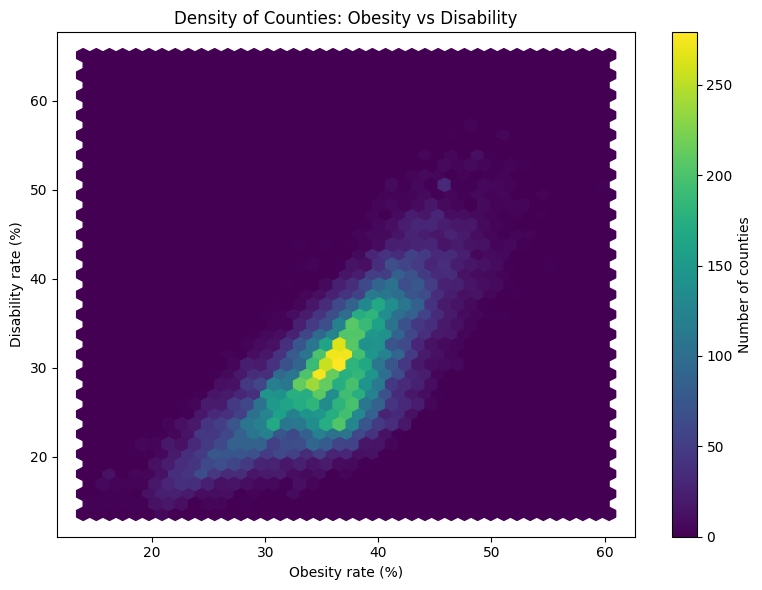

In [10]:
plt.figure(figsize=(8, 6))

x = dfWide["obesity among adults aged >=18 years"]
y = dfWide["any disability among adults aged >=18 years"]

hb = plt.hexbin(x, y, gridsize=40, cmap="viridis")
plt.colorbar(hb, label="Number of counties")

plt.xlabel("Obesity rate (%)")
plt.ylabel("Disability rate (%)")
plt.title("Density of Counties: Obesity vs Disability")

plt.tight_layout()
plt.show()


### Binned Barplot (Amit Bhatt)

Instead of just plotting raw depression vs disability, we can group counties into levels (Low, Medium, High, Very High depression), then show the average disability rate in each group.
This is like saying:
- “When depression is low, what is the typical disability rate?”


- “When depression is high, what is the typical disability rate?”

*What it shows*

- How disability changes as depression gets worse.


- Easier to read than a big cloud of points.


- Looks very nice in a presentation or report.






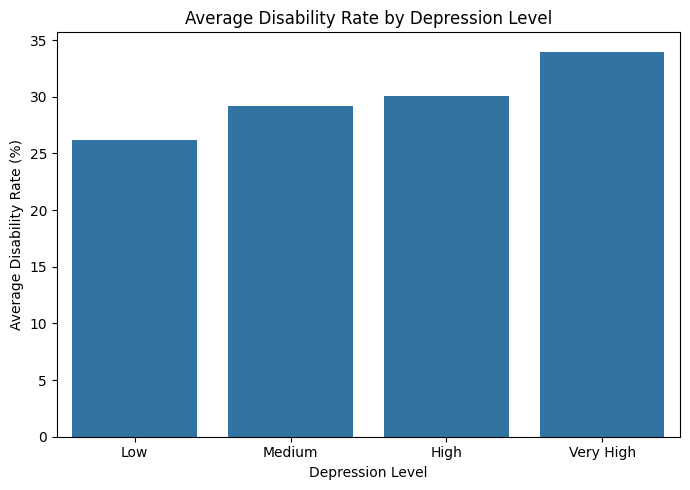

  Depression Level  any disability among adults aged >=18 years
0              Low                                    26.158704
1           Medium                                    29.163307
2             High                                    30.047825
3        Very High                                    33.994386


In [11]:
# Step 1: making depression levels (4 groups)
depression_col = "depression among adults aged >=18 years"
disability_col = "any disability among adults aged >=18 years"

dfWide["Depression Level"] = pd.qcut(
    dfWide[depression_col],
    q=4,
    labels=["Low", "Medium", "High", "Very High"]
)

# Step 2: computing average disability for each level
grouped = dfWide.groupby("Depression Level", observed=False)[disability_col].mean().reset_index()
grouped = grouped.sort_values("Depression Level") 

# Step 3: bar plot
plt.figure(figsize=(7, 5))
sns.barplot(data=grouped, x="Depression Level", y=disability_col)

plt.title("Average Disability Rate by Depression Level")
plt.xlabel("Depression Level")
plt.ylabel("Average Disability Rate (%)")

plt.tight_layout()
plt.show()

print(grouped)

### Bivariate Choropleth Map (Ryyan Hussain)

What it is:
A bivariate choropleth of U.S. states that classifies each state by median splits of two measures: binge drinking and any disability. The four categories (Low/High × Low/High) are color‑coded.

Why we’re using it:
Our earlier analysis found a negative relationship between binge drinking and disability at the state level. A bivariate map lets us see how these two measures co‑vary geographically, highlighting regional patterns and exceptions that aren’t obvious from a single‑measure map.

What it shows:
- Which states fall into each joint category (High/Low Drinking + High/Low Disability).
- Regional clustering (Southern vs Midwestern vs Eastern and so on).
- A visual check of the inverse relationship: states with higher drinking often show lower disability, and vice versa, while outliers stand out for further investigation.

Look at 'bivariate_chloropleth_map.png'

In [12]:
# Bivariate choropleth: Binge Drinking × Disability
import pandas as pd
import numpy as np
import plotly.express as px


dfWide = pd.read_csv('filtered_PLACESData_2023.csv')

# Columns for bivariate classification
drink_col = "binge drinking among adults aged >=18 years"
disab_col = "any disability among adults aged >=18 years"

# Compute state-level averages
state_avg = dfWide.groupby("StateAbbr")[[drink_col, disab_col]].mean().reset_index()

# Median splits
drink_med = state_avg[drink_col].median()
disab_med = state_avg[disab_col].median()

state_avg["Drinking Level"] = np.where(state_avg[drink_col] > drink_med, "High", "Low")
state_avg["Disability Level"] = np.where(state_avg[disab_col] > disab_med, "High", "Low")

state_avg["Category"] = (
    state_avg["Drinking Level"].map({"Low": "Low Drinking", "High": "High Drinking"})
    + ", " +
    state_avg["Disability Level"].map({"Low": "Low Disability", "High": "High Disability"})
)

# Bivariate palette
color_map = {
    "Low Drinking, Low Disability": "lightblue",
    "High Drinking, Low Disability": "blue",
    "Low Drinking, High Disability": "lightsalmon",
    "High Drinking, High Disability": "red",
}

# Choropleth
fig = px.choropleth(
    state_avg,
    locations="StateAbbr",
    locationmode="USA-states",
    scope="usa",
    color="Category",
    color_discrete_map=color_map,
    hover_name="StateAbbr",
    hover_data={
        drink_col: ':.2f',
        disab_col: ':.2f',
        "Drinking Level": True,
        "Disability Level": True,
    },
    title=(
        "Bivariate Map: Binge Drinking vs Disability (Median Splits)\n"
    )
)

fig.update_layout(legend_title_text="Drinking × Disability", margin=dict(l=0, r=0, t=80, b=0))
fig.show()

### Scatter Plot with Trend (Ryyan Hussain)

What it is:
A state-level scatter plot comparing the prevalence of “mental health not good ≥14 days” against “physical health not good ≥14 days,” using age‑adjusted rates. A fitted trend line summarizes the overall association.

Why we’re using it:
These two subjective health indicators are conceptually linked and often co‑vary. Plotting them together at the state level helps assess whether populations reporting frequent mental distress also report frequent physical distress, reinforcing a shared pattern in well‑being.

What it shows:
- The direction and strength of the relationship via the regression trend.
- How states cluster along the joint mental/physical distress spectrum.
- A numeric Pearson correlation to quantify the association.

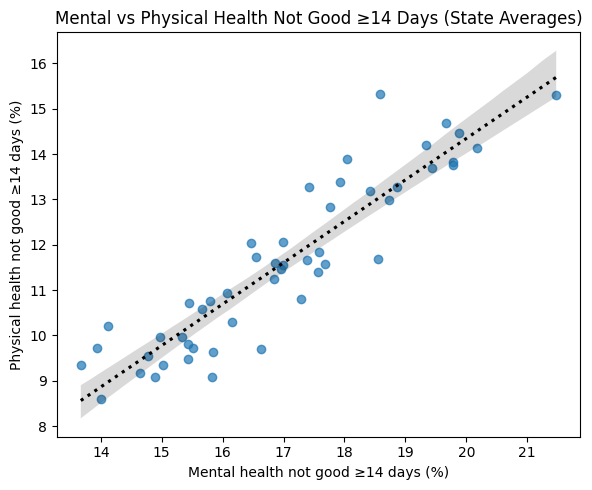

State-level Pearson correlation (mental vs physical ≥14 days): 0.916


In [13]:
# Mental vs Physical health (state-level) with trend line
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

raw_path = 'PLACES__Local_Data_for_Better_Health__Place_Data_2023_release.csv'
df = pd.read_csv(raw_path)

# Clean columns and measure names
df.columns = df.columns.str.strip()
df['Measure'] = df['Measure'].str.strip().str.lower()

# Use age-adjusted prevalence for comparability
df = df[df['Data_Value_Type'] == 'Age-adjusted prevalence']

# Target measures
col_mental14 = 'mental health not good for >=14 days among adults aged >=18 years'
col_physical14 = 'physical health not good for >=14 days among adults aged >=18 years'
col_fairpoor = 'fair or poor self-rated health status among adults aged >=18 years'
col_depression = 'depression among adults aged >=18 years'

needed = [col_mental14, col_physical14, col_fairpoor, col_depression]

# Filter to needed measures
df_sel = df[df['Measure'].isin(needed)].copy()

# Pivot to wide format at county level, then average to state level
df_wide = df_sel.pivot_table(
    index=['StateAbbr', 'LocationName'],
    columns='Measure',
    values='Data_Value'
).reset_index()

df_wide.columns.name = None

# Compute state-level averages
state_avg = df_wide.groupby('StateAbbr')[needed].mean().reset_index()

# Scatter with trend line: Mental (x) vs Physical (y)
plt.figure(figsize=(6,5))
sns.regplot(
    data=state_avg,
    x=col_mental14,
    y=col_physical14,
    scatter_kws={'alpha':0.7},
    line_kws={'color':'black','linestyle':':'}
)
plt.title('Mental vs Physical Health Not Good ≥14 Days (State Averages)')
plt.xlabel('Mental health not good ≥14 days (%)')
plt.ylabel('Physical health not good ≥14 days (%)')
plt.tight_layout()
plt.show()

# Print correlation for reference
corr = state_avg[[col_mental14, col_physical14]].corr().iloc[0,1]
print('State-level Pearson correlation (mental vs physical ≥14 days): {:.3f}'.format(corr))

### Additional Work - Visualization: Bubble Scatter (Ryyan Hussain)

What it is:
A state-level bubble scatter with x = obesity, y = disability. Point size indicates current smoking and color indicates no leisure‑time physical activity, visualizing how behavioral risks co‑move with disability.

Why we’re using it:
EDA and models indicate obesity and inactivity are key drivers of disability, with smoking adding risk. This visualization synthesizes these signals to highlight risk profiles.

What it shows:
- The overall obesity-disability relationship and slope.
- How inactivity (color) and smoking (size) amplify disability levels.
- States clustering into higher‑risk profiles, aiding prioritization for interventions.

Look at 'bubble_scatter.png'

In [14]:
# Socio-behavioral Drivers of Disability: Bubble Scatter (State Averages)
import pandas as pd
import plotly.express as px

filePath = "filtered_PLACESData_2023.csv"
dfWide = pd.read_csv(filePath)

# Columns needed
col_obesity = "obesity among adults aged >=18 years"
col_disability = "any disability among adults aged >=18 years"
col_smoking = "current smoking among adults aged >=18 years"
col_inactivity = "no leisure-time physical activity among adults aged >=18 years"

# State-level averages
state_avg = dfWide.groupby("StateAbbr")[[
    col_obesity, col_disability, col_smoking, col_inactivity
]].mean().reset_index()

state_avg = state_avg.dropna(subset=[col_obesity, col_disability, col_smoking, col_inactivity])

# Bubble scatter: x=obesity, y=disability, size=smoking, color=inactivity
fig = px.scatter(
    state_avg,
    x=col_obesity,
    y=col_disability,
    color=col_inactivity,
    size=col_smoking,
    size_max=22,
    hover_name="StateAbbr",
    hover_data={
        col_obesity: ':.2f',
        col_disability: ':.2f',
        col_smoking: ':.2f',
        col_inactivity: ':.2f',
    },
    color_continuous_scale="OrRd",
    labels={
        col_obesity: "Obesity (%)",
        col_disability: "Disability (%)",
        col_inactivity: "No leisure-time PA (%)",
        col_smoking: "Current smoking (%)",
    },
    title=(
        "Socio-behavioral Drivers of Disability: Obesity × Disability<br>"
        "Color = Inactivity, Size = Smoking (State Averages)"
    )
)

fig.update_layout(margin=dict(l=0, r=0, t=70, b=0))
fig.show()

## Machine learning

### Unsupervised Clustering (Arjun Ancha)

This ML practice is a 'search engine' used to help unveil natural hidden groupings among the health outcomes.
Since the model was unsupervised, it wasn't given any target but instead 4 health measures for all 27,000+ locations. 
and split into k=3 distinct clusters, which based on which locations are closer to each other. 
user can decide between clustering of a specific state or nationwide.

It would help test the idea if it would discover high-low risk on a high-low health measure.

based on the nationwide analysis,
We can see that in cluster 0, there is a 'high-risk, low drinking' relationship
and in cluster 1, there is a 'low-risk, high drinking' relationship
cluster 2 is just a middle ground or national average

Cluster Summary for National
         binge drinking among adults aged >=18 years  \
Cluster                                                
0                                              20.04   
1                                              14.83   
2                                              18.05   

         obesity among adults aged >=18 years  \
Cluster                                         
0                                       31.45   
1                                       41.97   
2                                       36.17   

         depression among adults aged >=18 years  \
Cluster                                            
0                                          20.15   
1                                          24.88   
2                                          24.35   

         any disability among adults aged >=18 years  
Cluster                                               
0                                              23.09  
1                 

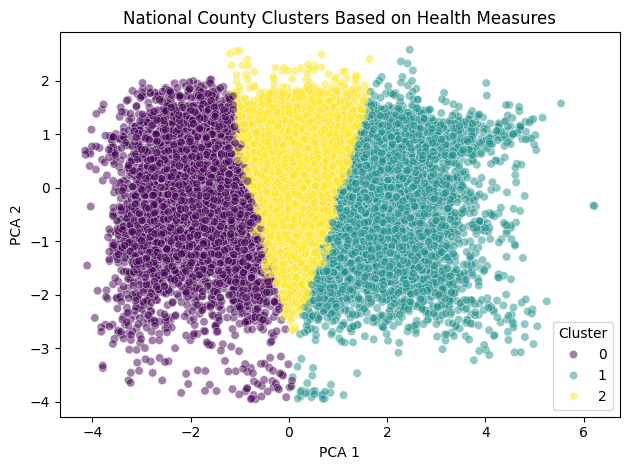

Mean Squared Error: 26.444355514293843
R² Score: 0.40527817033597535


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


choice = input("Would you like to analyze 'national' or 'state' data? ").strip().lower()


if choice == "state":
    stateAbbreviation = input("Enter the two-letter state abbreviation: ").strip().upper()
    dfSelected = dfWide[dfWide["StateAbbr"] == stateAbbreviation].copy()
elif choice == "national":
    stateAbbreviation = "National"
    dfSelected = dfWide.copy()
else:
    raise ValueError("Invalid input. Please type 'national' or 'state'.")


features = [
    "binge drinking among adults aged >=18 years",
    "obesity among adults aged >=18 years",
    "depression among adults aged >=18 years",
    "any disability among adults aged >=18 years"
]

dfSelected = dfSelected.dropna(subset=features)

X = dfSelected[features]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
dfSelected["Cluster"] = kmeans.fit_predict(X_scaled)


clusterSummary = dfSelected.groupby("Cluster")[features].mean().round(2)


print(f"Cluster Summary for {stateAbbreviation}")
print(clusterSummary)


pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
dfSelected["PCA1"] = pca_result[:, 0]
dfSelected["PCA2"] = pca_result[:, 1]


sns.scatterplot(
    data=dfSelected,
    x="PCA1",
    y="PCA2",
    hue="Cluster",
    palette="viridis",
    alpha=0.5
)
plt.title(f"{stateAbbreviation} County Clusters Based on Health Measures")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.tight_layout()
plt.show()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = dfSelected[["binge drinking among adults aged >=18 years"]]
y = dfSelected["any disability among adults aged >=18 years"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


### Supervised Learning (Mateo Castillo)

This ML practice is showing a prediction relation on how each feature affects the rate of dissability by 1%.

The table and bar chart that shows the specific impact of each feature.

Its giving a quantifiable recipe for the prediction And shows that shows that for every 1% increase in Binge Drinking, the model predicts a 0.97% decrease in Disability. 
But In contrast, a 1% increase in Obesity predicts a 0.65% increase in Disability. 
This shows and proves the inverse relationship found in the Heatmap.

Model Performance (R-squared)
Baseline R² (Mean guessing): -0.000
Linear Regression R² (testing set): 0.756




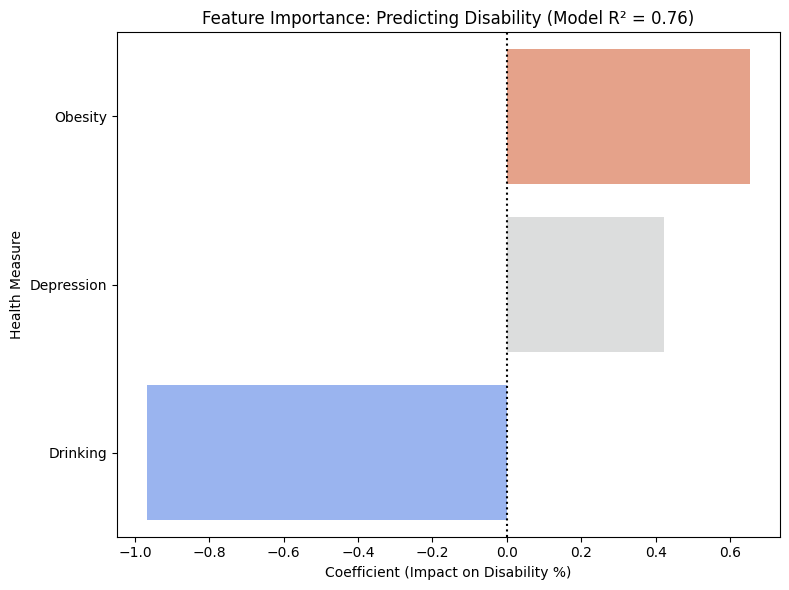

Model Coefficients
                                             Coefficient
obesity among adults aged >=18 years            0.653469
depression among adults aged >=18 years         0.423402
binge drinking among adults aged >=18 years    -0.967563


In [16]:
from sklearn.dummy import DummyRegressor

#defining features and target
#we want to predict disability based on the other three measures.
#target (Y)
target = "any disability among adults aged >=18 years"
#features (X)
features = [
    "obesity among adults aged >=18 years",
    "depression among adults aged >=18 years",
    "binge drinking among adults aged >=18 years"
]

# Build clean dataset without missing values
X = dfWide[features]
y = dfWide[target]

# Drop rows with NaN in target
target_mask = y.notna()
X = X.loc[target_mask]
y = y.loc[target_mask]

# Drop rows with any NaN in features
feature_mask = ~X.isna().any(axis=1)
X = X.loc[feature_mask]
y = y.loc[feature_mask]

#splitting data into training ant testing sets (80% is training, 20% is testing)
#doing this tests the model on data it has never seen before.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#This model serves as a baseline. It just predicts average disability rate every time. 
#a valuable model should beat it.
dummy_model = DummyRegressor(strategy="mean")
dummy_model.fit(X_train, y_train)
y_pred_dummy = dummy_model.predict(X_test)
r2_baseline = r2_score(y_test, y_pred_dummy)

#this is a supervised ML model using Linear Regression
#it'll learn relationship between the features and the target.
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_model = model.predict(X_test)
r2_model = r2_score(y_test, y_pred_model)

#printing interpretation to console
print(f"Model Performance (R-squared)")
print(f"Baseline R² (Mean guessing): {r2_baseline:.3f}")
print(f"Linear Regression R² (testing set): {r2_model:.3f}")
print("\n")

#Creating coefficient dataframe for visualizing
#this holds the results of the model, showing the impact of each feature.
coeffs = pd.DataFrame(model.coef_, index=features, columns=["Coefficient"])
coeffs_plot = coeffs.reset_index().rename(columns={"index": "Health Measure"})

#Creating the figure
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=coeffs_plot, y="Health Measure", x="Coefficient",hue="Health Measure", palette="coolwarm_r", legend=False)          
ax.set(title = f'Feature Importance: Predicting Disability (Model R² = {r2_model:.2f})',
       xlabel='Coefficient (Impact on Disability %)')

#renaming existing ticks
newLabels = ["Obesity", "Depression", "Drinking"]
ax.set_yticks(range(len(newLabels)))
ax.set_yticklabels(newLabels)

#adding vertical line at 0 for a clear baseline reference
ax.axvline(x=0, color='black', linestyle=':')

#tightening and showing the figure
plt.tight_layout()
plt.show()

#printing the raw results for accurate reference from data on plot
print("Model Coefficients")
print(coeffs)

### Support Vector Machine (Ryyan Hussain)

What it is:
Support Vector Regression with an RBF kernel that predicts state/county-level prevalence of “diagnosed diabetes among adults aged ≥18 years” from related behavioral and clinical risk factors. The workflow standardizes inputs, trains on a hold‑out split, and evaluates with R², MAE, and RMSE, alongside a Predicted‑vs‑Actual scatter.

Why we’re using it:
SVR captures potential non‑linear relationships between diabetes and upstream risks ( obesity, inactivity, high blood pressure, smoking, frequent poor mental health, etc). It provides a robust baseline to test how well these factors explain variation in diabetes prevalence across locations.

What it shows:
- Overall fit: R² and error metrics (MAE, RMSE) on held‑out data.
- Calibration: Predicted vs Actual plot with an identity line to assess alignment and any systematic bias.
- Result summary: Strong predictive accuracy with tight clustering around the identity line and slight underprediction at the highest prevalence values.

SVR (RBF) Performance
Train  -> R2: 0.932, RMSE: 0.741, MAE: 0.509
Test   -> R2: 0.927, RMSE: 0.749, MAE: 0.522


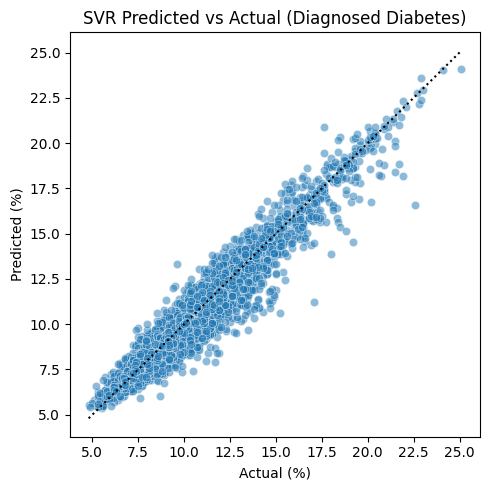

In [17]:
# SVR to predict diagnosed diabetes from related measures
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer

# Define target and features (exact column names in dfWide)
target = "diagnosed diabetes among adults aged >=18 years"
features = [
    "obesity among adults aged >=18 years",
    "no leisure-time physical activity among adults aged >=18 years",
    "high blood pressure among adults aged >=18 years",
    "current smoking among adults aged >=18 years",
    "mental health not good for >=14 days among adults aged >=18 years",
]

# Validate availability of columns
required = [target] + features
missing = [c for c in required if c not in dfWide.columns]
if missing:
    raise KeyError(f"Missing columns in dfWide needed for SVR: {missing}\n"
                   f"Ensure your filtered CSV includes these measures and re-run the earlier processing cell.")

X = dfWide[features]
y = dfWide[target]

# Drop rows where target is NaN (SVR requires numeric y)
mask = y.notna()
X = X.loc[mask]
y = y.loc[mask]

# Report NaN counts before imputation
nan_report = X.isna().sum().sort_values(ascending=False)
if (nan_report > 0).any():
    print("NaN counts in features before imputation:\n", nan_report[nan_report > 0])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline: impute -> standardize -> SVR with RBF kernel
svr_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("svr", SVR(kernel="rbf", C=10.0, epsilon=0.1, gamma="scale"))
])

svr_pipe.fit(X_train, y_train)

# Evaluate
pred_train = svr_pipe.predict(X_train)
pred_test = svr_pipe.predict(X_test)

r2_tr = r2_score(y_train, pred_train)
r2_te = r2_score(y_test, pred_test)

# Use legacy-compatible RMSE computation
rmse_tr = np.sqrt(mean_squared_error(y_train, pred_train))
rmse_te = np.sqrt(mean_squared_error(y_test, pred_test))
mae_tr = mean_absolute_error(y_train, pred_train)
mae_te = mean_absolute_error(y_test, pred_test)

print("SVR (RBF) Performance")
print(f"Train  -> R2: {r2_tr:.3f}, RMSE: {rmse_tr:.3f}, MAE: {mae_tr:.3f}")
print(f"Test   -> R2: {r2_te:.3f}, RMSE: {rmse_te:.3f}, MAE: {mae_te:.3f}")

# Predicted vs Actual plot
plt.figure(figsize=(5,5))
ax = sns.scatterplot(x=y_test, y=pred_test, alpha=0.5)
lims = [min(y_test.min(), pred_test.min()), max(y_test.max(), pred_test.max())]
plt.plot(lims, lims, linestyle=":", color="black")
ax.set(title="SVR Predicted vs Actual (Diagnosed Diabetes)", xlabel="Actual (%)", ylabel="Predicted (%)")
plt.tight_layout()
plt.show()

### Random Forest Regression (Joshua John)

A non-linear supervised model predicting disability prevalence.

This model uses a Random Forest Regressor to predict disability prevalence based on obesity, depression, and binge drinking rates. Unlike linear regression, random forests can capture non-linear patterns and complex interactions between variables. After training on 80% of counties and testing on the remaining 20%, the model provides an R² score and RMSE to evaluate performance. Feature importance values quantify each predictor's contribution, reinforcing earlier findings that obesity is the strongest positive predictor of disability, binge drinking is negatively associated, and depression plays a secondary positive role. This model adds robustness to our analysis by validating relationships through a non-linear ensemble approach.

Random Forest Performance on Test Set
R²:   0.802
RMSE: 2.965

Feature Importances:
                                       Feature  Importance
0         obesity among adults aged >=18 years    0.584183
2  binge drinking among adults aged >=18 years    0.291916
1      depression among adults aged >=18 years    0.123901


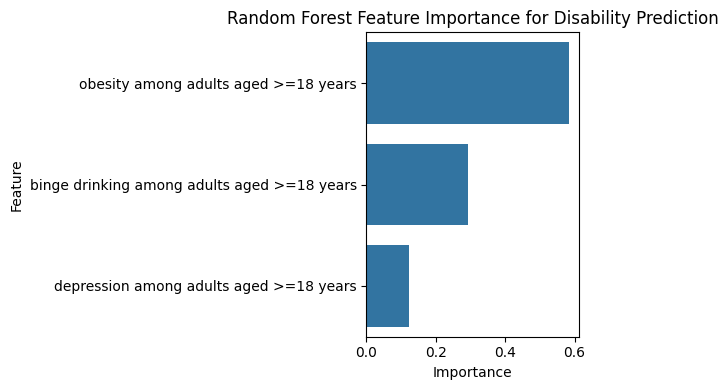

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Features used to predict disability
features = [
    "obesity among adults aged >=18 years",
    "depression among adults aged >=18 years",
    "binge drinking among adults aged >=18 years"
]

# Build X, y and drop rows with missing values in any of these columns
X = dfWide[features].dropna()
y = dfWide["any disability among adults aged >=18 years"].loc[X.index]

# Train/test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Random Forest model (non-linear ensemble)
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

# Predictions on test set
preds = rf.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)           # <-- compute RMSE manually
r2 = r2_score(y_test, preds)

print("Random Forest Performance on Test Set")
print(f"R²:   {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

# Feature importance
importances = pd.DataFrame({
    "Feature": features,
    "Importance": rf.feature_importances_
}).sort_values("Importance", ascending=False)

print("\nFeature Importances:")
print(importances)

# (Optional but nice) bar plot of feature importance
plt.figure(figsize=(6, 4))
sns.barplot(data=importances, x="Importance", y="Feature")
plt.title("Random Forest Feature Importance for Disability Prediction")
plt.tight_layout()
plt.show()


## High vs Low Disability Classifier (Amit Bhatt)

I built a Logistic Regression classifier to predict whether a county is High Disability (1) or Low Disability (0) based on three features: **obesity**, **depression**, and **binge drinking** rates. I created the label using the median disability rate as the cutoff, then split the data into 80% training and 20% testing.

The model’s accuracy and classification report show how well it separates high- vs low-disability counties. By looking at the coefficients/odds ratios, we see that higher obesity and depression are linked to a greater chance of being in the high-disability group, while binge drinking behaves differently, matching our earlier correlation and visualization results.


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# 1. Select columns we need
disability_col = "any disability among adults aged >=18 years"
feature_cols = [
    "obesity among adults aged >=18 years",
    "depression among adults aged >=18 years",
    "binge drinking among adults aged >=18 years"
]

# Keeping only rows with no missing values in these columns
df_ml = dfWide[feature_cols + [disability_col]].dropna().copy()

# 2. Creating binary target: High vs Low disability

median_disability = df_ml[disability_col].median()
print("Median disability rate:", median_disability)

# High Disability = 1 if above median, else 0
df_ml["HighDisability"] = (df_ml[disability_col] > median_disability).astype(int)

X = df_ml[feature_cols]
y = df_ml["HighDisability"]


# 3. test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # keep class balance
)

# 4. Scaling features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 5. Training Logistic Regression model

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)


# 6. Evaluating on test set

y_pred = log_reg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.3f}\n")

print("Classification report:")
print(classification_report(y_test, y_pred))

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))


# 7. Inspect model coefficients
coef_df = pd.DataFrame({
    "Feature": feature_cols,
    "Coefficient": log_reg.coef_[0]
}).sort_values("Coefficient", ascending=False)

print("\nLogistic Regression Coefficients (HighDisability = 1):")
print(coef_df)


Median disability rate: 29.2
Accuracy on test set: 0.840

Classification report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2670
           1       0.84      0.84      0.84      2636

    accuracy                           0.84      5306
   macro avg       0.84      0.84      0.84      5306
weighted avg       0.84      0.84      0.84      5306

Confusion matrix:
[[2252  418]
 [ 429 2207]]

Logistic Regression Coefficients (HighDisability = 1):
                                       Feature  Coefficient
0         obesity among adults aged >=18 years     1.803712
1      depression among adults aged >=18 years     0.842527
2  binge drinking among adults aged >=18 years    -1.620056


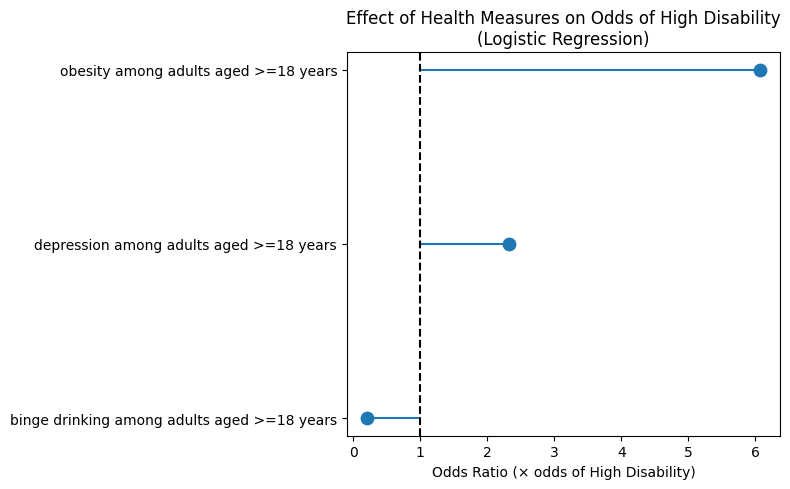

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Convert coefficients to odds ratios
coef_df["OddsRatio"] = np.exp(coef_df["Coefficient"])

# Sort for a cleaner plot
coef_sorted = coef_df.sort_values("OddsRatio")

plt.figure(figsize=(8, 5))

# y positions
y_pos = range(len(coef_sorted))

# Draw lines from OR=1 to each odds ratio
plt.hlines(
    y=y_pos,
    xmin=1,
    xmax=coef_sorted["OddsRatio"],
    linestyles="solid"
)

# Draw points at the odds ratios
plt.scatter(
    coef_sorted["OddsRatio"],
    y_pos,
    s=80
)

# Vertical reference line at OR = 1 (no effect)
plt.axvline(1, linestyle="--", color="black")

# Labels
plt.yticks(y_pos, coef_sorted["Feature"])
plt.xlabel("Odds Ratio (× odds of High Disability)")
plt.title("Effect of Health Measures on Odds of High Disability\n(Logistic Regression)")

plt.tight_layout()
plt.show()


##### This shows the logistic regression coefficients. Bars to the right of zero mean that higher values of that measure increase the chance a county ends up in the high disability group, and bars to the left mean the opposite. In this plot “Given obesity, depression, and binge drinking, we can tell whether this county is in the high-disability group or not.


## Reflection

Throughout this project, we worked with the CDC PLACES dataset to examine patterns in public health outcomes across the US. The process of cleaning, filtering, and restructuring the data established a strong foundation for subsequent exploration and analysis.  Using data visualizations, we identified clear regional trends, including a strong correlation between obesity and disability, as well as an inverse relationship between binge drinking and other negative health outcomes. These observations informed our preliminary machine learning models, which used predictive analysis to investigate our hypotheses and gather evidence. Integrating visualization with predictive analysis allowed us to validate patterns identified during the data exploration phase and gain a deeper understanding of the relationships among key health indicators nationwide.


## Next Steps

Our upcoming steps for the project will integrate all collected data together and prepare for the final report and presentation . We will hold team discussions to review the research that we have collected, evaluate the results, and analyze their implications in regard to our initial hypotheses made during our initial exploratory data analysis. These insights will be combined into a presentation that outlines our learning processes, early approaches, and the effectiveness of them. 

The presentation will be a deep analysis of our workflow, emphasizing our processes for data collection, filtering, and overall decision-making. We will walk through each stage of the project and examine how we came to our conclusions, including an assessment of failed approaches, unexpected challenges, and what we learned from them. The presentation will also include the visualizations we made along with our interpretation of them and an evaluation of how they fit with our initial hypotheses. We will conclude by discussing the takeaways from our results and its significance to contemporary American healthcare along with how data science can be applied to address complex issues in healthcare and support data driven thinking and decisions

